## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Review data files individually
# print(mouse_metadata, study_results)
# mouse_metadata.info()
# study_results.info()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df.describe()

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merge_df["Mouse ID"].value_counts()



g989    13
g288    10
k862    10
c758    10
s710    10
        ..
d133     1
v199     1
o848     1
b447     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_df.loc[merge_df.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
# NOTE:  Confirms same number of mice in dataset
clean_df["Mouse ID"].value_counts()

# NOTE:  Confirms absence of any duplicate data 
clean_df.loc[clean_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [8]:
# Explore difference between series and dataframe for mean values

mean = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 2)
mean


Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.46
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [9]:
ketmean = mean[3]
ketmean


55.24

In [10]:
mean_df = pd.DataFrame(mean)
mean_df

ketmean1 = mean_df.loc["Ketapril"]
ketmean1



Tumor Volume (mm3)    55.24
Name: Ketapril, dtype: float64

In [11]:
# Create a summary table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 2)
median = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 2)
var = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 2)
std = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 2)
sem = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 2)

mean_df = pd.DataFrame({"Mean": mean})
median_df = pd.DataFrame({"Median": median})
var_df = pd.DataFrame({"Variance": var}) 
std_df = pd.DataFrame({"Std. Dev.": std})
sem_df = pd.DataFrame({"SEM": sem})

statsum_df = pd.concat([mean_df, median_df, var_df, std_df, sem_df], axis = 1)
statsum_df


# stats = [mean, median, var, std, sem]

# statsum1 = pd.DataFrame(stats, columns = ["Mean", "Median", "Variance", "Std. Dev.", "SEM"])
# statsum1

# Ket = statsum_df[3]
# Ket


,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
stats = [mean, median, var, std, sem]

statsum1 = pd.DataFrame(stats, columns = ["Mean", "Median", "Variance", "Std. Dev.", "SEM"])
statsum1

# Ket = statsum_df[3]
# Ket

,Mean,Median,Variance,Std. Dev.,SEM
Tumor Volume (mm3),NaN,NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN,NaN


In [13]:
# Create a summary stats table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

columns = ["mean", "median", "var", "std", "sem"]
sumstat1_df = round(clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": columns}), 2)
sumstat1_df



Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.46  50.85  44.05  6.64  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [38]:
## Calcualte values for charts
# Group mouse ID's by regimen and return unique values
mouse_count_df = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

# Capnum = len(mouse_count["Stelasyn"])

mouse_count_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [20]:
# Create series to hold index values

regimen = mouse_count_df.index
regimen

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [21]:
# Count number of mice in each drug regimen using list comprehension; store in new series  
# NOTE:  print functions were used to check that values were calculating correctly and tied to proper index ref 
mice_num = []

for x in range(len(mouse_count_df.index)):
    mice_num.append(len(mouse_count_df[x]))
    # print(mouse_count_df.index[x])
    # print(len(mouse_count_df[x]))

mice_num


TypeError: object of type 'numpy.int64' has no len()

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# columns = ["mean", "median", "var", "std", "sem"]
# values = [mean, median, var, std, sem]

x_axis = np.arange(len(columns))

In [23]:
# Check default print plot size for matplotlib
print(plt.rcParams.get("figure.figsize"))



[6.4, 4.8]


In [24]:
# change the default size to widen x-axis for better data display
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5.5
plt.rcParams["figure.figsize"] = fig_size
print(fig_size)



[10, 5.5]


<IPython.core.display.Javascript object>


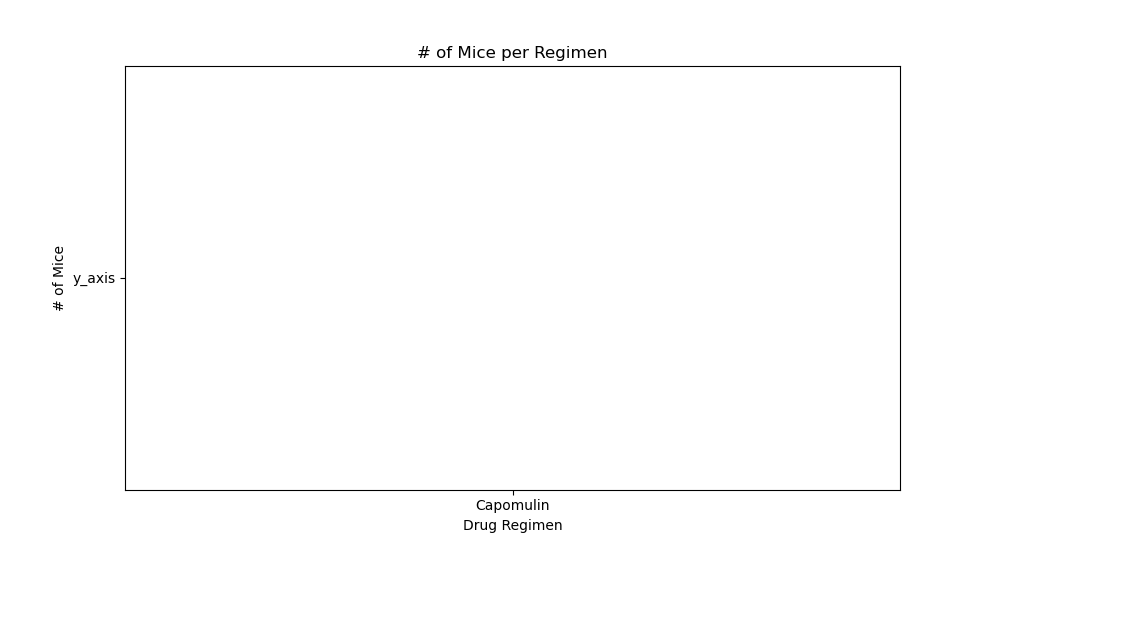

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_axis = np.arange(len(regimen))
# x_axis
plt.bar(x_axis, mice_num, color="b", align="center")



# Create a bar chart based upon the above data
# plt.bar(x_axis, bars_in_cities, color="b", align="center")


In [26]:
# Format matplotlib chart

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen)
plt.title("# of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")


Text(87.59722222222221, 0.5, '# of Mice')

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_df = clean_df.drop_duplicates(subset=["Mouse ID"], keep="first")
female = sex_df["Sex"].loc[sex_df["Sex"] == "Female"].count()
male = sex_df["Sex"].loc[sex_df["Sex"] == "Male"].count()
male


125

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

maxtumor_df = clean_df.groupby(["Drug Regimen", "Mouse ID", ])["Tumor Volume (mm3)"].max()

# pd.DataFrame(maxtumor_df)

Captumor = maxtumor_df["Capomulin"]
Ramtumor = maxtumor_df["Ramicane"]
Inftumor = maxtumor_df["Infubinol"]
Ceftumor = maxtumor_df["Ceftamin"]

# Inftumor


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [29]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Review Capomulin mouse trial data (looking for high number of time points for graph)

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
# capomulin_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]].groupby("Mouse ID").count()


In [32]:
# Select a mouse and review it's data

mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [33]:
# Create data for x-axis (timepoints) and y-axis (tummor volume)

x_axis = mouse["Timepoint"]
x_axis

y_axis = mouse["Tumor Volume (mm3)"]
y_axis

300    45.000000
301    45.651331
302    43.270852
303    43.784893
304    42.731552
305    43.262145
306    40.605335
307    37.967644
308    38.379726
309    38.982878
Name: Tumor Volume (mm3), dtype: float64

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.bar("x_axis", "y_axis")

<BarContainer object of 1 artists>

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
